In [19]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np

**Lectura e informacion de los datos**
---

In [4]:
data=pd.read_csv('../../Data/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,0,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


**Exploracion de datos nulos**
---

In [7]:
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
car           89
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
subscribed     0
dtype: int64

**Reporte con Sweetviz**
---

In [8]:
report=sweetviz.analyze(data)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Correlacion entre las columnas numéricas**
---

<Axes: >

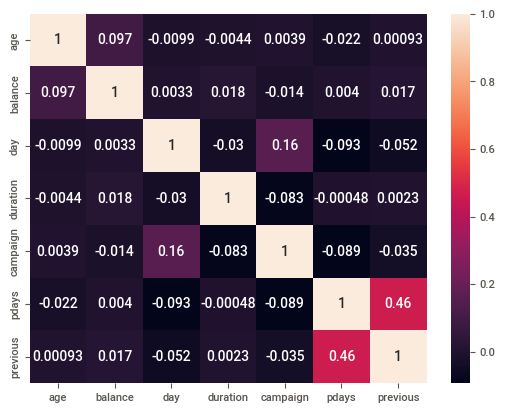

In [23]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)